# Question 6)

# a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
data_0 = np.loadtxt('data0.txt')
data_x = data_0[:,:2]
data_y = data_0[:,-1]

# b)

In [3]:
ind = np.random.choice(range(data_x.shape[0]), data_x.shape[0], replace=False)
x = data_x[ind]
y = data_y[ind]
j = 0
convergence = False
w = np.zeros((data_x.shape[1], 4))
b = np.zeros(4)

while j < 1000 and not convergence:
    j += 1
    wxb = (data_x @ w) + b.reshape((1, -1))
    convergence = np.allclose(np.argmax(wxb, axis = 1), data_y)
    for i in range(data_x.shape[0]):
        Xi = x[i]
        yi = int(y[i])
        y_pred = int(np.argmax(Xi.reshape((1, -1)) @ w + b))
        if yi != y_pred:
            w[:,yi] += Xi
            w[:,y_pred] -= Xi
            b[yi] += 1
            b[y_pred] -= 1

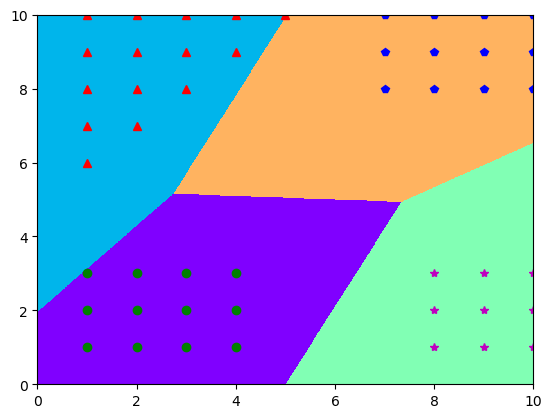

In [4]:
min_x, max_x = 0, 10
min_y, max_y = 0, 10

plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
xx, yy = np.meshgrid(np.arange(min_x, max_x + 0.01, 0.01), np.arange(min_y, max_y + 0.01, 0.01))
xxyy = np.c_[xx.flatten(), yy.flatten()]
z = np.zeros(len(xxyy))
for i, xy in enumerate(xxyy):
    
    xy_= xy.reshape((1, -1))
    z[i] = np.argmax((xy_ @ w).flatten() + b)
z = z.reshape(xx.shape)

for i in range(4):
    xi = data_x[data_y == i]
    yi = data_y[data_y == i]
    plt.plot(xi[:,0], xi[:, 1], ["og", "^r", "*m", "pb"][i])
plt.pcolormesh(xx, yy, z, cmap="rainbow", vmin=0, vmax=4)
plt.show()

# Question 7)

# a)

In [5]:
data_1 = np.loadtxt("data1.txt")
x1 = data_1[:,:-1]
y1 = data_1[:,-1]


data_2 = np.loadtxt("data2.txt")
x2 = data_2[:,:-1]
y2 = data_2[:,-1]

In [6]:
def quadratic_kernel(x1, y1):
    alpha = np.zeros(x1.shape[0])
    b = 0

    for i in range(5000):
        ind = np.random.choice(x1.shape[0], x1.shape[0], replace = False)
        for j in ind:
            xj = x1[j]
            yj = y1[j]
            terms = alpha.flatten() * y1.flatten()
            dots = np.square(1 + x1 @ xj.reshape((-1, 1))).flatten()
            w_dot_phi = np.dot(terms, dots)
            sign =  np.sign(w_dot_phi + b)

            if sign != yj:
                alpha[j] += 1
                b += yj
        dot_mat = np.square(1 + x1 @ x1.T)
        column_terms = (alpha * y1).reshape((-1, 1))

        logit_mat = dot_mat * column_terms
        prediction = np.sum(logit_mat, axis=0) + b
        convergence = np.allclose(np.sign(prediction), y1)
        if convergence:
            return  x1, y1, alpha, b

In [7]:
def plot(x1, y1, alpha, b):
    min_x, max_x = 0, 10
    min_y, max_y = 0, 10

    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)

    xx, yy = np.meshgrid(np.arange(min_x, max_x + 0.01, 0.01), np.arange(min_y, max_y + 0.01, 0.01))
    xxyy = np.c_[xx.flatten(), yy.flatten()]
    z = np.zeros(len(xxyy))
    for i, xy in enumerate(xxyy):

        xy_= xy.reshape((1, -1))
        phis = ((1 + x1 @ xy.reshape((-1, 1))) ** 2).flatten()
        decision = np.sum(alpha * y1 * phis) + b
        z[i] = np.sign(decision)
    z = z.reshape(xx.shape)
    for i, label in enumerate([-1, 1]):
        xi = x1[y1==label]
        yi = y1[y1==label]
        plt.plot(xi[:, 0], xi[:,1], ["^r", "og"][i])
    plt.pcolormesh(xx, yy, z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

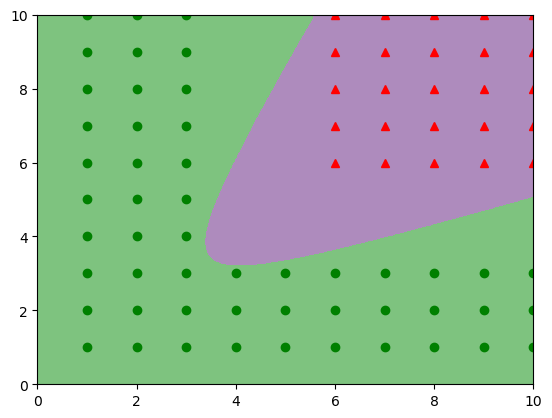

In [8]:
x1, y1, alpha, b = quadratic_kernel(x1, y1)
plot(x1, y1, alpha, b)

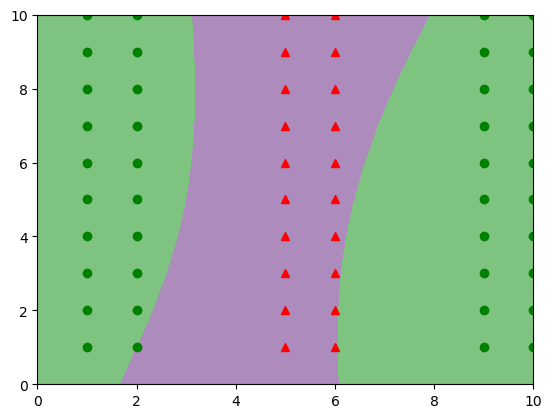

In [9]:
x2, y2, alpha, b = quadratic_kernel(x2, y2)
plot(x2, y2, alpha, b)

# b)

In [10]:
def rbf_kernel(s, x1, y1):
    alpha = np.zeros(x1.shape[0])
    b = 0
    convergence = False
    for i in range(5000):
        ind = np.random.choice(x1.shape[0], x1.shape[0], replace = False)
        for j in ind:
            xj = x1[j]
            yj = y1[j]
            terms = alpha.flatten()*y1.flatten()
            dist = np.exp(-np.sum(np.square(x1 - xj.reshape((1, -1))), axis = 1) / (s ** 2))
            decision =  np.sum(dist  *terms + b)
            sign = np.sign(decision)
            if sign != yj:
                alpha[j] += 1
                b += yj
        terms = alpha.flatten() * y1.flatten()
        
        for k in range(x1.shape[0]):
            xi = x1[k]
            yi = y1[k]
            distances = np.exp(-np.sum(np.square(x1 - xi.reshape((1, -1))), axis = 1) / (s ** 2))
            decision = np.sum(distances * terms) + b
            if not np.sign(decision) == yi:
                convergence = False
            else:
                convergence = True
        if convergence:
            return x1, y1, alpha, b

In [11]:
def plot_rbf(s, x1, y1, alpha, b):
    min_x, max_x = 0, 10
    min_y, max_y = 0, 10

    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)

    xx, yy = np.meshgrid(np.arange(min_x, max_x + 0.01, 0.01), np.arange(min_y, max_y + 0.01, 0.01))
    xxyy = np.c_[xx.flatten(), yy.flatten()]
    z = np.zeros(len(xxyy))
    for i, xy in enumerate(xxyy):

        xy_= xy.reshape((1, -1))
        terms = alpha.flatten() * y1.flatten()
        
        distances = np.exp(-np.sum(np.square(x1 - xy_.reshape((1, -1))), axis = 1) / (s ** 2))
        decision = np.sum(distances * terms) + b
        z[i] = np.sign(decision) 
    z = z.reshape(xx.shape)
    for i, label in enumerate([-1, 1]):
        xi = x1[y1==label]
        yi = y1[y1==label]
        plt.plot(xi[:, 0], xi[:,1], ["^r", "og"][i])
    plt.pcolormesh(xx, yy, z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

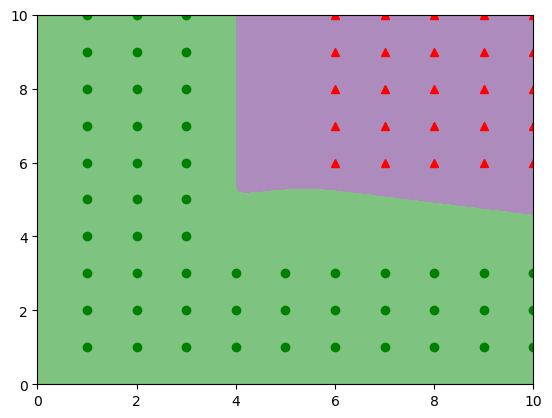

In [12]:
# data 1, scale = 1
x1, y1, alpha, b = rbf_kernel(1, x1, y1)
plot_rbf(1, x1, y1, alpha, b,)

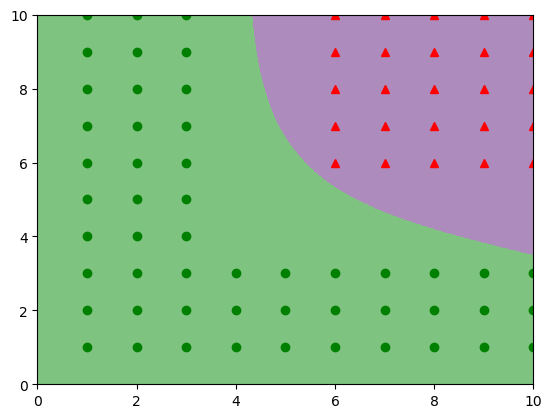

In [13]:
# data 1, scale = 5
x1, y1, alpha, b = rbf_kernel(5, x1, y1)
plot_rbf(5, x1, y1, alpha, b)

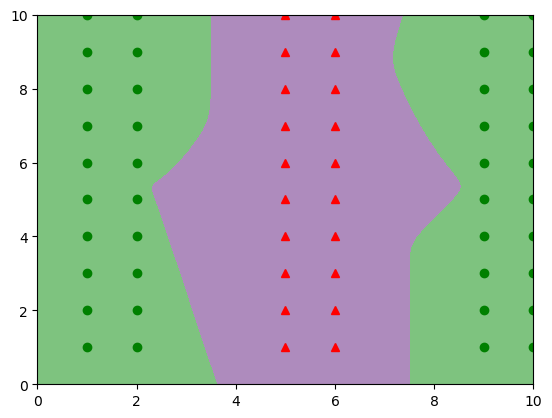

In [14]:
# data 2, scale = 1
x2, y2, alpha, b = rbf_kernel(1, x2, y2)
plot_rbf(1, x2, y2, alpha, b)

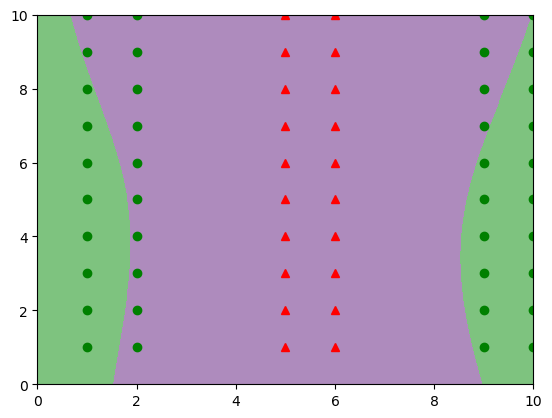

In [15]:
# data 2, scale = 5
x2, y2, alpha, b = rbf_kernel(5, x2, y2)
plot_rbf(5, x2, y2, alpha, b)

# Question 8)

# a)

In [16]:
data = ds.fetch_openml("mnist_784")
temp = []
j = 0
for i in data['target']:
    temp.append(int(i))
data_y = np.array(temp)
data_x = data['data'].to_numpy()

print(data_x.shape, data_y.shape)
x_train = data_x[:60000,:]
x_test = data_x[60000:,:]
y_train = data_y[:60000]
y_test = data_y[60000:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)
(60000, 784) (10000, 784) (60000,) (10000,)


# b)

In [17]:
c_vals = [0.01, 0.1, 1.0, 10, 100]

for c in c_vals:
    
    svm = LinearSVC(loss="hinge", C = c, max_iter = 500)
    svm_fit = svm.fit(x_train, y_train)
    prediction_train = svm_fit.predict(x_train)
    train_diff = np.not_equal(y_train.flatten(), prediction_train)
    error_train = np.mean(train_diff)
    
    prediction_test = svm_fit.predict(x_test)
    
    test_diff = np.not_equal(y_test.flatten(), prediction_test)

    error_test = np.mean(test_diff)
    
    print("C: ", c, "Train error: ", error_train, "Test error: ", error_test)

/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.01 Train error:  0.12753333333333333 Test error:  0.1357


/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  0.1 Train error:  0.1741 Test error:  0.1854


/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  1.0 Train error:  0.1153 Test error:  0.1184


/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:  10 Train error:  0.12755 Test error:  0.1382


/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


C:  100 Train error:  0.12055 Test error:  0.1249


/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# c)

In [18]:
svm = SVC(kernel="poly", degree = 2, C = 1.0, max_iter = 500)
svm_fit = svm.fit(x_train, y_train)
prediction_train = svm_fit.predict(x_train)
sv = len(svm_fit.support_)

train_diff = np.not_equal(y_train.flatten(), prediction_train)
error_train = np.mean(train_diff)

prediction_test = svm_fit.predict(x_test)

test_diff = np.not_equal(y_test.flatten(), prediction_test)

error_test = np.mean(test_diff)

print("# of support vectors: ", sv, "Train error: ", error_train, "Test error: ", error_test)

/Users/nguyenduyanh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# of support vectors:  9158 Train error:  0.013966666666666667 Test error:  0.0244
